#### PRAGADEESH M  225229126 

### 1. Import libraries

In [4]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\2mscdsa26\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN

### 2. Creation of data

In [11]:
df = pd.read_csv("quotes.csv")

In [12]:
df.head()

,Text,Label
0,Today I give thanks to everyone who has been p...,1
1,Nothing is particularly hard if you break it d...,1
2,Go confidently in the direction of your dreams...,1
3,If you change your mindset you have the abilit...,1
4,All our dreams can come true if we have the co...,1


### 3. Opening your CSV file

In [13]:
import csv

In [14]:
file = open('quotes.csv')
type(file)

_io.TextIOWrapper

In [15]:
csvreader = csv.reader(file)

In [16]:
file.close()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    20 non-null     object
 1   Label   20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


##### 4. Pre-processing the text

In [18]:
y = df['Label']
X = df['Text']

##### 5. Dataset Preparation

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [22]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(14,)
(6,)
(14,)
(6,)


In [23]:
# 4th step to be continue
train_token = Tokenizer(num_words=100,oov_token='<oov>')
train_token.fit_on_texts(X_train)
word_index = train_token.word_index
train_sequence = train_token.texts_to_sequences(X_train)
dict(list(word_index.items())[0:10])

{'<oov>': 1,
 'you': 2,
 'the': 3,
 'to': 4,
 'negative': 5,
 'is': 6,
 'in': 7,
 'we': 8,
 'of': 9,
 'life': 10}

In [30]:
train_padded = pad_sequences(train_sequence,maxlen=100,padding='post')

In [31]:
val_token = Tokenizer(num_words=500,oov_token='<oov>')
val_token.fit_on_texts(X_val)
val_index = val_token.word_index
val_sequence = val_token.texts_to_sequences(X_val)

In [32]:
val_padded = pad_sequences(val_sequence,maxlen=100,padding='post')

### 6. Model Creation

In [34]:
model = Sequential()
# Embedding layer
model.add(Embedding(300,70,input_length=100))
model.add(SimpleRNN(70,activation='relu'))
model.add(Dense('1',activation='sigmoid'))

In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 70)           21000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 70)                9870      
                                                                 
 dense_1 (Dense)             (None, 1)                 71        
                                                                 
Total params: 30,941
Trainable params: 30,941
Non-trainable params: 0
_________________________________________________________________


In [37]:
history=model.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 3s - loss: 0.6932 - accuracy: 0.5000 - 3s/epoch - 3s/step
Epoch 2/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 16ms/epoch - 16ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 18ms/epoch - 18ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 16ms/epoch - 16ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 19ms/epoch - 19ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 28ms/epoch - 28ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 17ms/epoch - 17ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 17ms/epoch - 17ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 18ms/epoch - 18ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 16ms/epoch - 16ms/step


In [38]:
model.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 471ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931484341621399, 0.5]

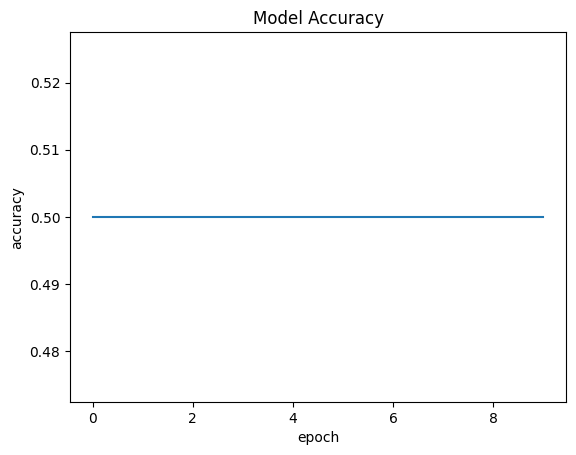

In [39]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

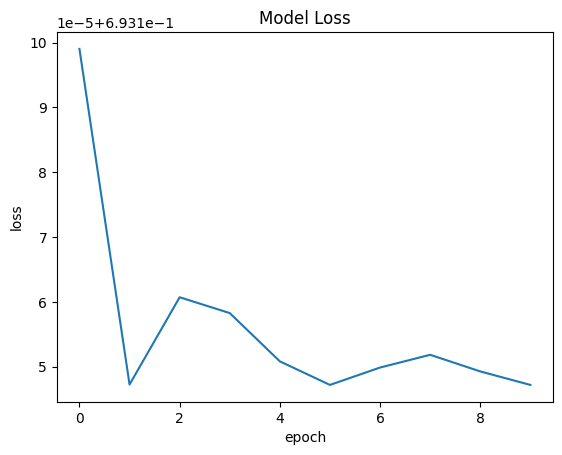

In [40]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [41]:
text = df["Text"]

In [42]:
#sent = [w.lower() for w in text.split() if not w in STOPWORDS]
trail_token = Tokenizer()
trail_token.fit_on_texts(text)
#word_index = trail_token.word_index
trail_seq = trail_token.texts_to_sequences(text)
#dict(list(word_index.items())[0:10])
trail_pad = pad_sequences(trail_seq,maxlen=100,padding='post')

In [43]:
res = model.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 0s 257ms/step
[[0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]
 [0.5008251]] negative


C:\Users\2mscdsa26\AppData\Local\Temp\ipykernel_19716\1535703611.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])


### Model 2

In [44]:
model1 = Sequential()
# Embedding layer
model1.add(Embedding(5000,64,input_length=100))
model1.add(SimpleRNN(32,activation='tanh'))
model1.add(Embedding(5000,32,input_length=100))
model1.add(SimpleRNN(32,activation='tanh' ))
model1.add(Dense('1',activation='sigmoid'))

In [45]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                3104      
                                                                 
 embedding_3 (Embedding)     (None, 32, 32)            160000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 485,217
Trainable params: 485,217
Non-trainable params: 0
_________________________________________________________________


In [46]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
history1=model1.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 2s - loss: 0.6932 - accuracy: 0.5000 - 2s/epoch - 2s/step
Epoch 2/10
1/1 - 0s - loss: 0.7095 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6947 - accuracy: 0.5000 - 11ms/epoch - 11ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6964 - accuracy: 0.5000 - 12ms/epoch - 12ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6999 - accuracy: 0.5000 - 11ms/epoch - 11ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6973 - accuracy: 0.5000 - 11ms/epoch - 11ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6943 - accuracy: 0.5000 - 17ms/epoch - 17ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 12ms/epoch - 12ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6936 - accuracy: 0.5000 - 26ms/epoch - 26ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6945 - accuracy: 0.5000 - 17ms/epoch - 17ms/step


In [48]:
model1.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 423ms/step - loss: 0.6950 - accuracy: 0.5000


[0.6949875950813293, 0.5]

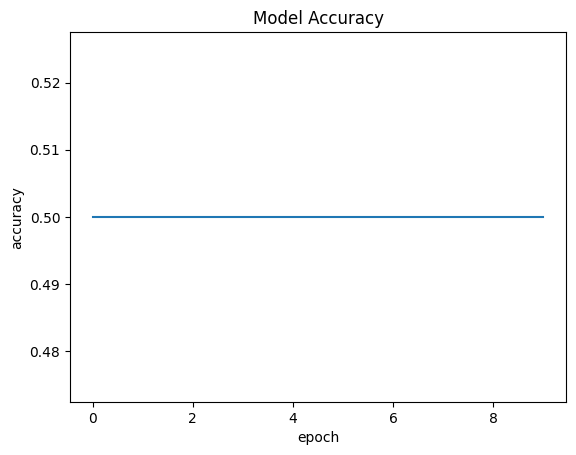

In [49]:
plt.plot(history1.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

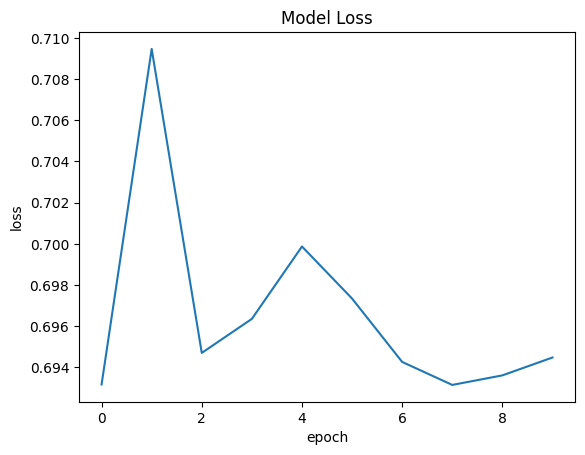

In [50]:
plt.plot(history1.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [51]:
res = model1.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 0s 343ms/step
[[0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.530307  ]
 [0.53030694]
 [0.53030694]] negative


C:\Users\2mscdsa26\AppData\Local\Temp\ipykernel_19716\2701450631.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])


### Model 3

In [52]:
model2 = Sequential()
# Embedding layer
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh'))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='relu' ))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh' ))
model2.add(Dense('1',activation='sigmoid'))

In [53]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 128)          512000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 64)                12352     
                                                                 
 embedding_5 (Embedding)     (None, 64, 128)           512000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                12352     
                                                                 
 embedding_6 (Embedding)     (None, 64, 128)           512000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_3 (Dense)             (None, 1)                

In [54]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
history2=model2.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 2s - loss: 0.6948 - accuracy: 0.5000 - 2s/epoch - 2s/step
Epoch 2/10
1/1 - 0s - loss: 0.6950 - accuracy: 0.5000 - 21ms/epoch - 21ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6935 - accuracy: 0.5000 - 23ms/epoch - 23ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6937 - accuracy: 0.5000 - 19ms/epoch - 19ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6941 - accuracy: 0.5000 - 21ms/epoch - 21ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6934 - accuracy: 0.5000 - 17ms/epoch - 17ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 23ms/epoch - 23ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6935 - accuracy: 0.5000 - 22ms/epoch - 22ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6936 - accuracy: 0.5000 - 22ms/epoch - 22ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6934 - accuracy: 0.5000 - 24ms/epoch - 24ms/step


In [56]:
model2.evaluate(val_padded,y_val)

1/1 [==============================] - 1s 577ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693192183971405, 0.5]

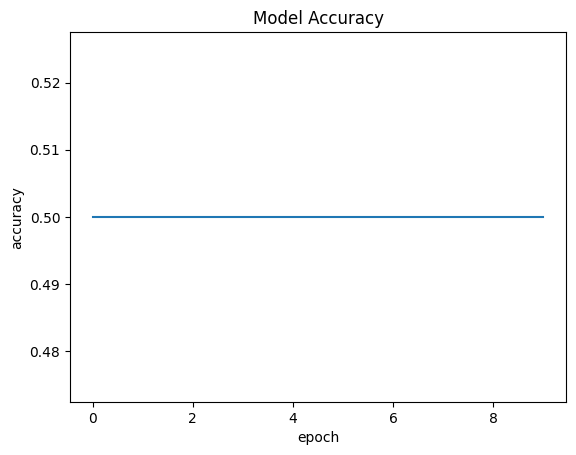

In [57]:
plt.plot(history2.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

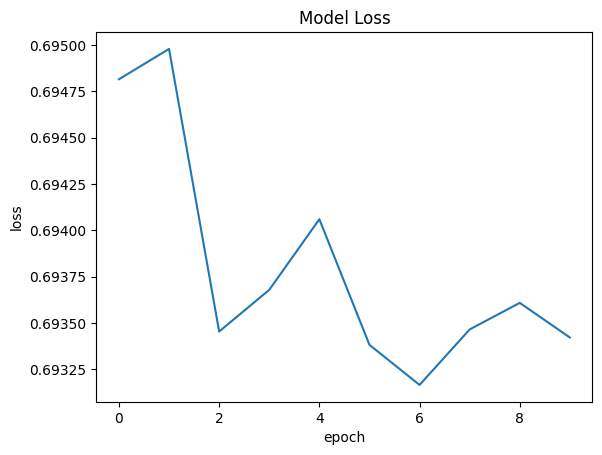

In [58]:
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [59]:
res = model2.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 1s 656ms/step
[[0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]
 [0.4952567]] negative


C:\Users\2mscdsa26\AppData\Local\Temp\ipykernel_19716\479605851.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])
